# newest

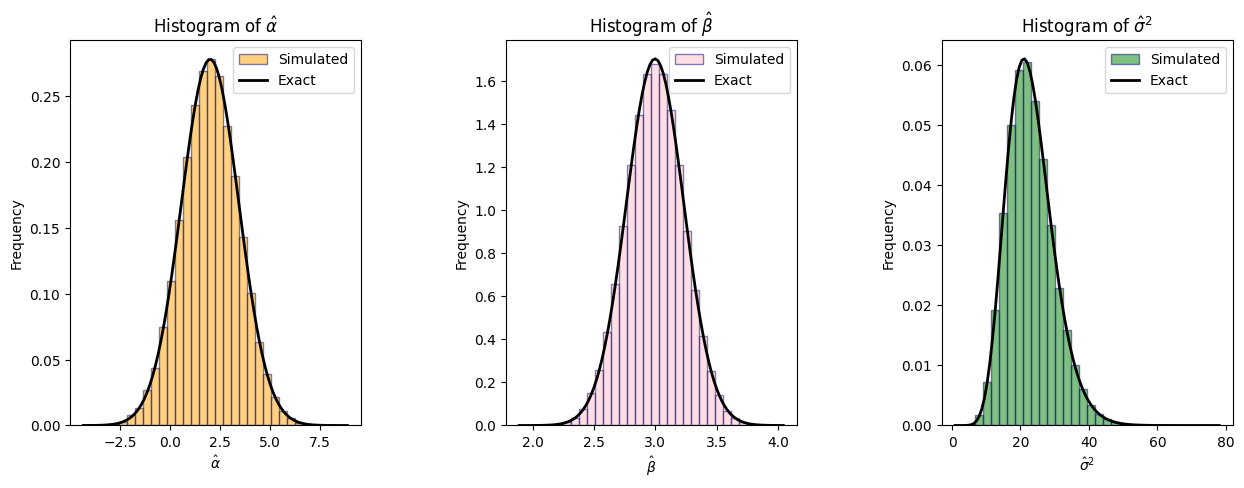

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

np.random.seed(123)
α = 2
β = 3
σ2 = 10
sample_size = 25
M = 100000

α_hat = np.zeros(M)
β_hat = np.zeros(M)
σ2_hat = np.zeros(M)

for i in range(M):
    x = np.linspace(1,10, sample_size)
    y = α + β * x + np.random.normal(0, np.sqrt(σ2), sample_size)

    one = np.ones(sample_size)
    A = np.column_stack([one, x])
    estimation = np.linalg.inv(A.T @ A) @ (A.T @ y)

    α_hat[i] = estimation[0]
    β_hat[i] = estimation[1]
    σ2_hat[i] = (1/(sample_size-2)) * np.sum((y - α_hat[i] - (β_hat[i] * x))**2)

σ2_hat = ((sample_size-2)*σ2_hat)/σ2

# Plotting histograms
plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 3, 1)
plt.hist(α_hat, bins=30, density=True, alpha=0.5, label='Simulated',color = 'orange',edgecolor = 'darkblue')
plt.title('Histogram of $\\hat{\\alpha}$')
plt.xlabel('$\\hat{\\alpha}$')
plt.ylabel('Frequency')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(α_hat), np.std(α_hat))
plt.plot(x, p, 'k', linewidth=2, label='Exact')

plt.legend()

plt.subplot(1, 3, 2)
plt.hist(β_hat, bins=30, density=True, alpha=0.5, label='Simulated',color = 'pink',edgecolor= 'darkblue')
plt.title('Histogram of $\\hat{\\beta}$')
plt.xlabel('$\\hat{\\beta}$')
plt.ylabel('Frequency')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(β_hat), np.std(β_hat))
plt.plot(x, p, 'k', linewidth=2, label='Exact')

plt.legend()

plt.subplot(1, 3, 3)
plt.hist(σ2_hat, bins=30, density=True, alpha=0.5, label='Simulated', color = 'green',edgecolor = 'darkblue')
plt.title('Histogram of $\\hat{\\sigma}^2$')
plt.xlabel('$\\hat{\\sigma}^2$')
plt.ylabel('Frequency')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
df = sample_size - 2 # Degrees of freedom for a chi-squared distribution
p = chi2.pdf(x, df)
plt.plot(x, p, 'k', linewidth=2, label='Exact')

plt.legend()

plt.show()
